# Introduction
CIFAR-10 Dataset Overview
Contents: 60,000 32x32 color images in 10 classes

50,000 training + 10,000 test images

Classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
x_train.shape
x_test.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
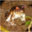

In [ ]:
x_train[0]


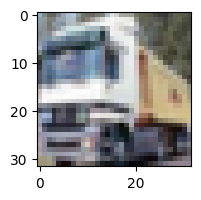

In [ ]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[1])

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)
y_train.shape

(50000,)

In [ ]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
#function
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

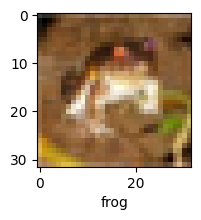

In [ ]:
plot_sample(x_train,y_train,0)

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),  # Flattens 32x32x3 image to 3072 pixels
    layers.Dense(3000, activation='relu'),    # Hidden layer with 3000 neurons
    layers.Dense(1000, activation='relu'),    # Hidden layer with 1000 neurons
    layers.Dense(10, activation='sigmoid')   # Output layer for 10 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
ann.compile(
    optimizer='SGD',                           # Stochastic Gradient Descent
    loss='sparse_categorical_crossentropy',    # Loss function for integer labels
    metrics=['accuracy']                       # Tracks accuracy during training
)

In [ ]:
ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 86ms/step - accuracy: 0.2975 - loss: 1.9381
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 81ms/step - accuracy: 0.4124 - loss: 1.6524
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 79ms/step - accuracy: 0.4543 - loss: 1.5527
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 74ms/step - accuracy: 0.4752 - loss: 1.4895
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 153s 81ms/step - accuracy: 0.4943 - loss: 1.4382


In [ ]:
ann.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.4559 - loss: 1.5332


[1.535919189453125, 0.453000009059906]

In [ ]:
from sklearn.metrics import classification_report
y_pred = ann.predict(x_test)  # Model outputs probabilities for each class
y_pred_classes = [np.argmax(element) for element in y_pred]  # Converts to class labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step


In [ ]:
y_pred_classes = np.array(y_pred_classes) # Convert the list y_pred_classes to a NumPy array
y_pred_classes

array([3, 9, 8, ..., 5, 2, 7])

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.44      0.53      1000
           1       0.66      0.52      0.58      1000
           2       0.30      0.52      0.38      1000
           3       0.46      0.05      0.09      1000
           4       0.62      0.14      0.23      1000
           5       0.38      0.45      0.41      1000
           6       0.59      0.42      0.50      1000
           7       0.31      0.81      0.45      1000
           8       0.66      0.58      0.62      1000
           9       0.54      0.59      0.57      1000

    accuracy                           0.45     10000
   macro avg       0.52      0.45      0.44     10000
weighted avg       0.52      0.45      0.44     10000



In [ ]:
# use cnn model
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',    # Loss function for integer labels
    metrics=['accuracy']                       # Tracks accuracy during training
)

In [ ]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 44ms/step - accuracy: 0.4141 - loss: 1.6151
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.6282 - loss: 1.0625
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 40ms/step - accuracy: 0.6924 - loss: 0.8889
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 50ms/step - accuracy: 0.7319 - loss: 0.7733
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.7612 - loss: 0.6892
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 43ms/step - accuracy: 0.7858 - loss: 0.6144
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 39ms/step - accuracy: 0.8053 - loss: 0.5551
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.8285 - loss: 0.4829
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.8512 - loss: 0.4234
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.8770 - loss: 0.3635


In [ ]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6881 - loss: 1.0952


[1.1003295183181763, 0.6876000165939331]

In [ ]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [ ]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

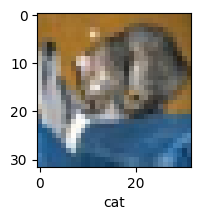

In [ ]:
plot_sample(x_test,y_test,0)

In [ ]:
y_pred=cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


array([[4.01155994e-04, 9.91681418e-07, 4.86619829e-05, 9.55970109e-01,
        1.26040948e-04, 4.16703261e-02, 5.47459873e-04, 5.24847455e-05,
        1.17880048e-03, 3.91555750e-06],
       [8.80166499e-06, 4.48255189e-04, 4.23959079e-07, 6.10674578e-09,
        5.72793861e-11, 3.70270047e-12, 2.95357835e-11, 1.64693855e-12,
        9.99542296e-01, 2.38939577e-07],
       [7.13519096e-01, 5.69402659e-03, 4.89973987e-04, 1.77061829e-05,
        1.22660367e-05, 3.84904888e-06, 5.33548291e-06, 4.18242671e-05,
        2.57998645e-01, 2.22172588e-02],
       [6.40012920e-01, 1.47303445e-02, 4.76344395e-03, 1.91557297e-06,
        2.76571245e-05, 8.31907965e-09, 3.31317369e-06, 7.17582225e-08,
        3.40459168e-01, 1.00182706e-06],
       [4.22778541e-08, 5.96919847e-08, 2.86133820e-03, 1.22426189e-02,
        4.70849037e-01, 3.44314642e-04, 5.13701260e-01, 1.15572174e-08,
        1.17797367e-06, 1.00867705e-08]], dtype=float32)

In [ ]:
np.argmax(y_pred[0])

np.int64(3)

In [ ]:
y_pred_classes=[np.argmax(element) for element in y_pred]
y_pred_classes[:5]

[np.int64(3), np.int64(8), np.int64(0), np.int64(0), np.int64(6)]

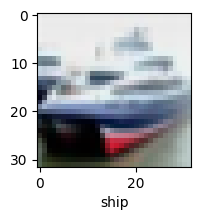

In [ ]:
plot_sample(x_test,y_test,1)

In [ ]:
classes[y_pred_classes[1]]

'ship'

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.76      0.72      1000
           1       0.80      0.84      0.82      1000
           2       0.58      0.58      0.58      1000
           3       0.52      0.48      0.50      1000
           4       0.68      0.56      0.62      1000
           5       0.54      0.63      0.58      1000
           6       0.78      0.72      0.75      1000
           7       0.73      0.74      0.73      1000
           8       0.77      0.83      0.80      1000
           9       0.80      0.74      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

